In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [327]:
#read in merged cognitive and temperament data metrics
data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_fluid_ARMS1_merged.csv")
data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_fluid_ARMS2_merged.csv")
#data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_list_ARMS1_merged.csv")
#data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_list_ARMS2_merged.csv")
xgb_data_arms1 = pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/fluid_arms1_cog_data_with_arms2_xgb_model.csv")
xgb_data_arms2 = pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/fluid_arms2_cog_data_with_arms1_xgb_model.csv")

In [328]:
xgb_data_arms1

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,4
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,4
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,5
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,3
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,NDAR_INVZWAPL39H,11836,47437,131,F,10,5,5,6,8,...,110,107,94,144,106,110,119.0,119.0,123.0,5
3268,NDAR_INVZWP0XZ9A,11838,47437,111,M,11,7,4,7,12,...,107,110,109,99,95,107,106.0,103.0,105.0,1
3269,NDAR_INVZYC44GB8,11853,47437,131,M,5,2,2,4,4,...,119,100,94,103,65,110,93.0,113.0,104.0,2
3270,NDAR_INVZZFG6J5U,11867,47437,129,F,15,10,5,14,10,...,101,80,94,95,79,90,83.0,96.0,87.0,1


In [329]:
data_arms1 = data_arms1.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)
data_arms2 = data_arms2.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)
xgb_data_arms1 = xgb_data_arms1.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)
xgb_data_arms2 = xgb_data_arms2.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)

In [330]:
xgb_data_arms2

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,120.0,88.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,7
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,131.0,78.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,1
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,153.0,83.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,2
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,109.0,97.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,3
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,120.0,116.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,NDAR_INVZZ35KHXP,11862,47437,109,M,12,8,6,7,8,...,87.0,97.0,90.0,91.0,88.0,96.0,92.0,90.0,89.0,9
3090,NDAR_INVZZ3P1ZFJ,11863,47437,115,M,11,3,9,7,14,...,77.0,88.0,72.0,21.0,67.0,75.0,45.0,71.0,49.0,8
3091,NDAR_INVZZ6ZJ2KY,11865,47437,124,F,12,12,6,5,8,...,112.0,101.0,112.0,136.0,92.0,100.0,106.0,107.0,108.0,7
3092,NDAR_INVZZ81LEEV,11866,47437,108,M,14,5,8,10,11,...,98.0,97.0,81.0,91.0,88.0,96.0,89.0,97.0,91.0,2


In [331]:
#filter dataframes to include only communities with more than 100 participants
communities_more_than_100_arms1 = data_arms1['community'].value_counts()[data_arms1['community'].value_counts() > 100].index
filtered_data_arms1 = data_arms1[data_arms1['community'].isin(communities_more_than_100_arms1)]
communities_more_than_100_arms2 = data_arms2['community'].value_counts()[data_arms2['community'].value_counts() > 100].index
filtered_data_arms2 = data_arms2[data_arms2['community'].isin(communities_more_than_100_arms2)]

In [332]:
#convert community to a categorical variable to ensure proper ordering on the x-axis
filtered_data_arms1.loc[:, 'community'] = pd.Categorical(filtered_data_arms1['community'])
filtered_data_arms2.loc[:, 'community'] = pd.Categorical(filtered_data_arms2['community'])
xgb_data_arms1.loc[:, 'community'] = pd.Categorical(xgb_data_arms1['community'])
xgb_data_arms2.loc[:, 'community'] = pd.Categorical(xgb_data_arms2['community'])

In [333]:
communities_more_than_100_arms2

Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='community')

In [334]:
filtered_data_arms2.dtypes

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1      float64
nihtbx_flanker_agecorrected.baseline_yea

In [335]:
xgb_data_arms2.dtypes

subject_id                                               object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1      float64
nihtbx_flanker_agecorrected.baseline_yea

In [336]:
def se(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

In [337]:
print(filtered_data_arms1.dtypes)

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1        int64
nihtbx_flanker_agecorrected.baseline_yea

In [338]:
#calculate mean and standard error by community for ARMS1 and ARMS2
mean_and_se_by_community_arms1 = filtered_data_arms1.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in filtered_data_arms1.filter(regex='^(bis|upps|nihtbx).*').columns})
mean_and_se_by_community_arms2 = filtered_data_arms2.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in filtered_data_arms2.filter(regex='^(bis|upps|nihtbx).*').columns})

mean_and_se_xgb_arms2comm_arms1data = xgb_data_arms1.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in xgb_data_arms1.filter(regex='^(bis|upps|nihtbx).*').columns})
mean_and_se_xgb_arms1comm_arms2data = xgb_data_arms2.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in xgb_data_arms2.filter(regex='^(bis|upps|nihtbx).*').columns})

In [339]:
mean_and_se_by_community_arms2.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bas_drive.baseline_year_1_arm_1              mean    float64
                                                      se      float64
bis_y_ss_bas_fs.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bis_sum.baseline_year_1_arm_1                mean    float64
                                                      se      float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_sensation_

In [340]:
mean_and_se_xgb_arms1comm_arms2data.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bas_drive.baseline_year_1_arm_1              mean    float64
                                                      se      float64
bis_y_ss_bas_fs.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bis_sum.baseline_year_1_arm_1                mean    float64
                                                      se      float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_sensation_

In [341]:
#consolidate columns 
mean_and_se_by_community_arms1.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms1.columns.values]
mean_and_se_by_community_arms2.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms2.columns.values]
mean_and_se_xgb_arms2comm_arms1data.columns = ['_'.join(col).strip() for col in mean_and_se_xgb_arms2comm_arms1data.columns.values]
mean_and_se_xgb_arms1comm_arms2data.columns = ['_'.join(col).strip() for col in mean_and_se_xgb_arms1comm_arms2data.columns.values]

In [342]:
mean_and_se_xgb_arms1comm_arms2data.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_rr.baseline_year_1_arm_1_se                     float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_mean                float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_se                  float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_se                     float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_mean                  float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_se                    float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean        float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_se          float64
upps_y_ss_sensation_seeking.baseli

In [343]:
mean_and_se_by_community_arms1.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_rr.baseline_year_1_arm_1_se                     float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_mean                float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_se                  float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_se                     float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_mean                  float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_se                    float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean        float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_se          float64
upps_y_ss_sensation_seeking.baseli

# capturing all data averages

In [344]:
#calculate mean and standard error for all ABCD participants (nihtbx and upps/bisbas)
#first, save all cognitive and temperament data as dfs and merge it into one 
arms1_test_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS1_test_FRF_UPPS_short_for_FRF_fixed.csv")
arms1_train_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS1_train_FRF_UPPS_short_for_FRF_fixed.csv")
arms2_test_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS2_test_FRF_UPPS_short_for_FRF_fixed.csv")
arms2_train_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS2_train_FRF_UPPS_short_for_FRF_fixed.csv")

combined_full_data = pd.concat([arms1_test_full_data, arms1_train_full_data, arms2_test_full_data, arms2_train_full_data])

In [345]:
combined_full_data

,Unnamed: 0,dataset_id.baseline_year_1_arm_1.x,src_subject_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,1,47437,NDAR_INV003RTV85,131,F,9.0,2.0,6.0,2.0,10.0,...,122.0,101.0,100.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0
1,3,47437,NDAR_INV007W6H7B,126,M,5.0,1.0,1.0,6.0,6.0,...,122.0,92.0,107.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0
2,4,47437,NDAR_INV00BD7VDC,112,M,6.0,2.0,5.0,11.0,8.0,...,98.0,116.0,145.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0
3,6,47437,NDAR_INV00HEV6HB,124,M,13.0,4.0,7.0,4.0,12.0,...,92.0,74.0,93.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0
4,8,47437,NDAR_INV00LH735Y,109,M,12.0,3.0,6.0,2.0,5.0,...,98.0,88.0,82.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,11858,47437,NDAR_INVZYTK0K1Y,110,F,15.0,9.0,7.0,17.0,13.0,...,131.0,107.0,131.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0
2545,11859,47437,NDAR_INVZZ0348LF,131,F,12.0,6.0,7.0,10.0,7.0,...,102.0,92.0,100.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0
2546,11861,47437,NDAR_INVZZ1MNPK5,124,F,12.0,3.0,5.0,15.0,11.0,...,183.0,119.0,107.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0
2547,11870,47437,NDAR_INVZZLZCKAY,110,F,10.0,3.0,5.0,17.0,9.0,...,98.0,88.0,103.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0


In [346]:
#combined_full_data = combined_full_data.drop('nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1', axis=1)
combined_full_data = combined_full_data.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)

In [347]:
combined_full_data

,Unnamed: 0,dataset_id.baseline_year_1_arm_1.x,src_subject_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,1,47437,NDAR_INV003RTV85,131,F,9.0,2.0,6.0,2.0,10.0,...,10.0,122.0,101.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0
1,3,47437,NDAR_INV007W6H7B,126,M,5.0,1.0,1.0,6.0,6.0,...,10.0,122.0,92.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0
2,4,47437,NDAR_INV00BD7VDC,112,M,6.0,2.0,5.0,11.0,8.0,...,6.0,98.0,116.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0
3,6,47437,NDAR_INV00HEV6HB,124,M,13.0,4.0,7.0,4.0,12.0,...,7.0,92.0,74.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0
4,8,47437,NDAR_INV00LH735Y,109,M,12.0,3.0,6.0,2.0,5.0,...,5.0,98.0,88.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,11858,47437,NDAR_INVZYTK0K1Y,110,F,15.0,9.0,7.0,17.0,13.0,...,10.0,131.0,107.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0
2545,11859,47437,NDAR_INVZZ0348LF,131,F,12.0,6.0,7.0,10.0,7.0,...,5.0,102.0,92.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0
2546,11861,47437,NDAR_INVZZ1MNPK5,124,F,12.0,3.0,5.0,15.0,11.0,...,5.0,183.0,119.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0
2547,11870,47437,NDAR_INVZZLZCKAY,110,F,10.0,3.0,5.0,17.0,9.0,...,5.0,98.0,88.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0


In [348]:
#combine relevant columns for analysis
combined_full_data_rel_cols = combined_full_data.filter(regex='^(src|bis|upps|nihtbx).*')
combined_full_data_rel_cols.loc[:, 'community'] = 'all'
combined_full_data_rel_cols

/tmp/ipykernel_841350/1763277919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_full_data_rel_cols.loc[:, 'community'] = 'all'


,src_subject_id.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,9.0,2.0,6.0,2.0,10.0,7.0,11.0,7.0,10.0,122.0,101.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0,all
1,NDAR_INV007W6H7B,5.0,1.0,1.0,6.0,6.0,8.0,11.0,6.0,10.0,122.0,92.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0,all
2,NDAR_INV00BD7VDC,6.0,2.0,5.0,11.0,8.0,8.0,7.0,11.0,6.0,98.0,116.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0,all
3,NDAR_INV00HEV6HB,13.0,4.0,7.0,4.0,12.0,11.0,12.0,6.0,7.0,92.0,74.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0,all
4,NDAR_INV00LH735Y,12.0,3.0,6.0,2.0,5.0,4.0,6.0,11.0,5.0,98.0,88.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0,all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,NDAR_INVZYTK0K1Y,15.0,9.0,7.0,17.0,13.0,12.0,6.0,8.0,10.0,131.0,107.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0,all
2545,NDAR_INVZZ0348LF,12.0,6.0,7.0,10.0,7.0,4.0,6.0,10.0,5.0,102.0,92.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0,all
2546,NDAR_INVZZ1MNPK5,12.0,3.0,5.0,15.0,11.0,8.0,11.0,12.0,5.0,183.0,119.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0,all
2547,NDAR_INVZZLZCKAY,10.0,3.0,5.0,17.0,9.0,10.0,9.0,6.0,5.0,98.0,88.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0,all


In [349]:
#group and aggregate by community for all data
mean_and_se_all_data_nih = combined_full_data_rel_cols.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in combined_full_data_rel_cols.filter(regex='^(bis|upps|nihtbx).*').columns}
)

In [350]:
mean_and_se_all_data_nih

bis_y_ss_bas_rr.baseline_year_1_arm_1            \
                                           mean        se   
community                                                   
all                                   10.996104  0.027135   

          bis_y_ss_bas_drive.baseline_year_1_arm_1            \
                                              mean        se   
community                                                      
all                                       4.131959  0.028465   

          bis_y_ss_bas_fs.baseline_year_1_arm_1            \
                                           mean        se   
community                                                   
all                                     5.69703  0.024577   

          bis_y_ss_bis_sum.baseline_year_1_arm_1            \
                                            mean        se   
community                                                    
all                                     9.514892  0.034862   

          upps_y_ss_negative_urgency.baseline_year_1_arm_1            ...  \
                                                      mean        se  ...   
community                                                             ...   
all                                               8.485843  0.024573  ...   

          nihtbx_picture_agecorrected.baseline_year_1_arm_1            \
                                                       mean        se   
community                                                               
all                                              100.990748  0.150222   

          nihtbx_reading_agecorrected.baseline_year_1_arm_1            \
                                                       mean        se   
community                                                               
all                                              102.497345  0.177264   

          nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1            \
                                                         mean        se   
community                                                                 
all                                                95.568633   0.161352   

          nihtbx_cryst_agecorrected.baseline_year_1_arm_1           \
                                                     mean       se   
community                                                            
all                                              105.4887  0.16972   

          nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1            
                                                         mean        se  
community                                                                
all                                               100.375427   0.166685  

[1 rows x 36 columns]

In [351]:
#consolidate columns
mean_and_se_all_data_nih.columns = ['_'.join(col).strip() for col in mean_and_se_all_data_nih.columns.values]

In [352]:
mean_and_se_all_data_nih

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.69703,0.024577,9.514892,0.034862,8.485843,0.024573,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.4887,0.16972,100.375427,0.166685


# combining all data averages with other communities

In [353]:
#merge arms1/arms2 community data with all data metrics
mean_and_se_by_community_arms1_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_by_community_arms1])
mean_and_se_by_community_arms2_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_by_community_arms2])
mean_and_se_xgb_arms2comm_arms1data_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_xgb_arms2comm_arms1data])
mean_and_se_xgb_arms1comm_arms2data_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_xgb_arms1comm_arms2data])

In [354]:
mean_and_se_by_community_arms2_combined

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,0.024573,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685
1,12.661309,0.079032,7.900115,0.062777,7.098737,0.088339,10.487945,0.138070,9.064294,0.097208,...,99.563375,0.553710,99.908840,0.590025,94.480712,0.586820,102.186092,0.563415,97.708611,0.567315
2,9.714286,0.107640,2.456829,0.062609,4.701727,0.078324,8.566719,0.120477,8.145997,0.086787,...,103.253846,0.594277,107.087284,0.792040,99.754003,0.637610,111.844427,0.724489,106.678807,0.653108
3,10.884977,0.126110,2.960094,0.071529,6.105634,0.115284,10.018779,0.160671,10.230047,0.106187,...,101.497653,0.811218,100.603286,0.815495,94.277465,0.867409,103.470657,0.796911,98.434507,0.842186
4,9.880096,0.154074,2.100719,0.075153,3.820144,0.101850,8.964029,0.186943,7.014388,0.121241,...,101.913669,0.787768,102.000000,0.906254,96.815348,0.823634,105.000000,0.866518,100.788969,0.840232
5,10.628492,0.133024,2.675978,0.079924,5.005587,0.097220,9.245810,0.167374,8.617318,0.111978,...,103.935754,0.947528,104.134078,1.016966,98.562849,0.887749,107.972067,0.989392,103.673464,0.944130
6,9.845324,0.173061,2.125899,0.095110,4.647482,0.116629,8.597122,0.207790,6.517986,0.122809,...,103.676259,0.934627,108.381295,1.306593,100.748201,0.945358,112.341727,1.178774,107.579137,1.047974
7,13.186916,0.183584,3.252336,0.151460,9.859813,0.095248,10.794393,0.362387,9.000000,0.271168,...,103.747664,1.576984,105.626168,1.744403,98.551402,1.587024,109.971963,1.612389,104.794393,1.553078


In [355]:
mean_and_se_xgb_arms2comm_arms1data_combined

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,0.024573,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685
1,12.689895,0.077053,8.083624,0.064829,7.182346,0.088094,10.483159,0.131247,8.983740,0.094237,...,99.598142,0.552240,100.437863,0.605628,94.070732,0.585864,102.560116,0.548276,97.666163,0.564908
2,9.645553,0.100287,2.315364,0.057157,4.690027,0.070937,8.545822,0.116591,8.066038,0.081897,...,104.105121,0.611080,107.606469,0.737393,100.916173,0.610728,112.034906,0.687716,107.469946,0.630105
3,11.034826,0.126498,3.017413,0.074424,6.405473,0.112243,9.845771,0.167828,9.895522,0.117817,...,100.676617,0.755299,101.848259,0.879714,95.302985,0.808951,104.519950,0.816721,99.648010,0.803313
4,9.786920,0.135748,1.995781,0.074429,3.873418,0.096928,9.181435,0.169303,7.426160,0.106185,...,102.191983,0.732228,102.639241,0.795129,97.043249,0.810821,106.358650,0.803476,101.795781,0.805949
5,10.461126,0.137430,2.533512,0.079221,5.029491,0.094483,9.093834,0.175582,8.533512,0.113416,...,104.332440,0.845348,104.949062,0.993631,99.052279,0.850177,107.264879,0.915963,103.511528,0.860948
6,10.552147,0.146264,2.282209,0.089360,4.733129,0.108087,8.858896,0.211190,6.668712,0.116833,...,104.116564,0.872914,107.628834,1.125726,98.382515,0.868664,111.888650,1.001407,105.892331,0.929724
7,12.861702,0.198715,3.138298,0.161921,9.829787,0.103295,10.085106,0.387891,7.946809,0.251905,...,101.691489,1.715729,105.191489,1.775187,100.521277,1.662961,108.393617,1.687711,105.180851,1.626885


In [356]:
#reset index to make community a column
mean_and_se_by_community_arms1_combined = mean_and_se_by_community_arms1_combined.reset_index()
mean_and_se_by_community_arms2_combined = mean_and_se_by_community_arms2_combined.reset_index()
mean_and_se_xgb_arms2comm_arms1data_combined = mean_and_se_xgb_arms2comm_arms1data_combined.reset_index()
mean_and_se_xgb_arms1comm_arms2data_combined = mean_and_se_xgb_arms1comm_arms2data_combined.reset_index()

In [357]:
mean_and_se_by_community_arms2_combined

,community,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
0,all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685
1,1,12.661309,0.079032,7.900115,0.062777,7.098737,0.088339,10.487945,0.138070,9.064294,...,99.563375,0.553710,99.908840,0.590025,94.480712,0.586820,102.186092,0.563415,97.708611,0.567315
2,2,9.714286,0.107640,2.456829,0.062609,4.701727,0.078324,8.566719,0.120477,8.145997,...,103.253846,0.594277,107.087284,0.792040,99.754003,0.637610,111.844427,0.724489,106.678807,0.653108
3,3,10.884977,0.126110,2.960094,0.071529,6.105634,0.115284,10.018779,0.160671,10.230047,...,101.497653,0.811218,100.603286,0.815495,94.277465,0.867409,103.470657,0.796911,98.434507,0.842186
4,4,9.880096,0.154074,2.100719,0.075153,3.820144,0.101850,8.964029,0.186943,7.014388,...,101.913669,0.787768,102.000000,0.906254,96.815348,0.823634,105.000000,0.866518,100.788969,0.840232
5,5,10.628492,0.133024,2.675978,0.079924,5.005587,0.097220,9.245810,0.167374,8.617318,...,103.935754,0.947528,104.134078,1.016966,98.562849,0.887749,107.972067,0.989392,103.673464,0.944130
6,6,9.845324,0.173061,2.125899,0.095110,4.647482,0.116629,8.597122,0.207790,6.517986,...,103.676259,0.934627,108.381295,1.306593,100.748201,0.945358,112.341727,1.178774,107.579137,1.047974
7,7,13.186916,0.183584,3.252336,0.151460,9.859813,0.095248,10.794393,0.362387,9.000000,...,103.747664,1.576984,105.626168,1.744403,98.551402,1.587024,109.971963,1.612389,104.794393,1.553078


In [358]:
mean_and_se_xgb_arms2comm_arms1data_combined

,community,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
0,all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685
1,1,12.689895,0.077053,8.083624,0.064829,7.182346,0.088094,10.483159,0.131247,8.983740,...,99.598142,0.552240,100.437863,0.605628,94.070732,0.585864,102.560116,0.548276,97.666163,0.564908
2,2,9.645553,0.100287,2.315364,0.057157,4.690027,0.070937,8.545822,0.116591,8.066038,...,104.105121,0.611080,107.606469,0.737393,100.916173,0.610728,112.034906,0.687716,107.469946,0.630105
3,3,11.034826,0.126498,3.017413,0.074424,6.405473,0.112243,9.845771,0.167828,9.895522,...,100.676617,0.755299,101.848259,0.879714,95.302985,0.808951,104.519950,0.816721,99.648010,0.803313
4,4,9.786920,0.135748,1.995781,0.074429,3.873418,0.096928,9.181435,0.169303,7.426160,...,102.191983,0.732228,102.639241,0.795129,97.043249,0.810821,106.358650,0.803476,101.795781,0.805949
5,5,10.461126,0.137430,2.533512,0.079221,5.029491,0.094483,9.093834,0.175582,8.533512,...,104.332440,0.845348,104.949062,0.993631,99.052279,0.850177,107.264879,0.915963,103.511528,0.860948
6,6,10.552147,0.146264,2.282209,0.089360,4.733129,0.108087,8.858896,0.211190,6.668712,...,104.116564,0.872914,107.628834,1.125726,98.382515,0.868664,111.888650,1.001407,105.892331,0.929724
7,7,12.861702,0.198715,3.138298,0.161921,9.829787,0.103295,10.085106,0.387891,7.946809,...,101.691489,1.715729,105.191489,1.775187,100.521277,1.662961,108.393617,1.687711,105.180851,1.626885


In [359]:
#convert data from wide to long format
value_columns = [col for col in mean_and_se_by_community_arms1_combined.columns if col != 'community']
value_columns2 = [col for col in mean_and_se_by_community_arms2_combined.columns if col != 'community']
value_columns

['bis_y_ss_bas_rr.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_rr.baseline_year_1_arm_1_se',
 'bis_y_ss_bas_drive.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_drive.baseline_year_1_arm_1_se',
 'bis_y_ss_bas_fs.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_fs.baseline_year_1_arm_1_se',
 'bis_y_ss_bis_sum.baseline_year_1_arm_1_mean',
 'bis_y_ss_bis_sum.baseline_year_1_arm_1_se',
 'upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean',
 'upps_y_ss_negative_urgency.baseline_year_1_arm_1_se',
 'upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean',
 'upps_y_ss_positive_urgency.baseline_year_1_arm_1_se',
 'upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean',
 'upps_y_ss_lack_of_planning.baseline_year_1_arm_1_se',
 'upps_y_ss_sensation_seeking.baseline_year_1_arm_1_mean',
 'upps_y_ss_sensation_seeking.baseline_year_1_arm_1_se',
 'upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1_mean',
 'upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1_se',
 'nihtbx_picvocab_agecorrected.baseline_year

In [360]:
#convert data from wide to long format
mean_and_se_by_community_long_arms1 = pd.melt(mean_and_se_by_community_arms1_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_by_community_long_arms2 = pd.melt(mean_and_se_by_community_arms2_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_xgb_arms2comm_arms1data_long = pd.melt(mean_and_se_xgb_arms2comm_arms1data_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_xgb_arms1comm_arms2data_long = pd.melt(mean_and_se_xgb_arms1comm_arms2data_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')

In [361]:
mean_and_se_xgb_arms2comm_arms1data_long

,community,metric,value
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.996104
1,1,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.689895
2,2,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.645553
3,3,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,11.034826
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.786920
...,...,...,...
283,3,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.803313
284,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.805949
285,5,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.860948
286,6,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.929724


In [362]:
mean_and_se_by_community_long_arms2

,community,metric,value
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.996104
1,1,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.661309
2,2,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.714286
3,3,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.884977
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.880096
...,...,...,...
283,3,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.842186
284,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.840232
285,5,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.944130
286,6,nihtbx_totalcomp_agecorrected.baseline_year_1_...,1.047974


# select dataframes for figures

In [533]:
#user input to select desired communities from each arm
communities_to_plot_arms1 = input("Select communities to plot for ARMS1 (comma separated): ").split(',')
communities_to_plot_arms2 = input("Select communities to plot for ARMS2 (comma separated): ").split(',')
xgb_arms1comm_to_plot_arms2data = input("Select communities to plot for ARMS1xgb preds w/ ARMS2 data (comma separated): ").split(',')
xgb_arms2comm_to_plot_arms1data = input("Select communities to plot for ARMS2xgb preds w/ ARMS1 data (comma separated): ").split(',')

Select communities to plot for ARMS1 (comma separated):  all
Select communities to plot for ARMS2 (comma separated):  4,7
Select communities to plot for ARMS1xgb preds w/ ARMS2 data (comma separated):  all
Select communities to plot for ARMS2xgb preds w/ ARMS1 data (comma separated):  4,7


In [534]:
communities_to_plot_arms1

['all']

In [535]:
xgb_arms1comm_to_plot_arms2data

['all']

In [536]:
print(mean_and_se_by_community_long_arms1['community'].apply(type).value_counts())

community
<class 'str'>    360
Name: count, dtype: int64


In [537]:
print(mean_and_se_xgb_arms1comm_arms2data_long['community'].apply(type).value_counts())

community
<class 'str'>    360
Name: count, dtype: int64


In [538]:
#set community values to strings to match user input 
mean_and_se_by_community_long_arms1['community'] = mean_and_se_by_community_long_arms1['community'].astype(str)
mean_and_se_by_community_long_arms2['community'] = mean_and_se_by_community_long_arms2['community'].astype(str)
mean_and_se_xgb_arms2comm_arms1data_long['community'] = mean_and_se_xgb_arms2comm_arms1data_long['community'].astype(str)
mean_and_se_xgb_arms1comm_arms2data_long['community'] = mean_and_se_xgb_arms1comm_arms2data_long['community'].astype(str)

In [539]:
mean_and_se_by_community_long_arms2['community'].isin(communities_to_plot_arms1)

0       True
1      False
2      False
3      False
4      False
       ...  
283    False
284    False
285    False
286    False
287    False
Name: community, Length: 288, dtype: bool

In [540]:
mean_and_se_xgb_arms2comm_arms1data_long['community'].isin(xgb_arms2comm_to_plot_arms1data)

0      False
1      False
2      False
3      False
4       True
       ...  
283    False
284     True
285    False
286    False
287     True
Name: community, Length: 288, dtype: bool

In [541]:
#filter and combine data based on selected communities
mean_and_se_by_community_selected_arms1 = mean_and_se_by_community_long_arms1[mean_and_se_by_community_long_arms1['community'].isin(communities_to_plot_arms1)]
mean_and_se_by_community_selected_arms2 = mean_and_se_by_community_long_arms2[mean_and_se_by_community_long_arms2['community'].isin(communities_to_plot_arms2)]
mean_and_se_xgb_arms1comm_arms2data_selected = mean_and_se_xgb_arms1comm_arms2data_long[mean_and_se_xgb_arms1comm_arms2data_long['community'].isin(xgb_arms1comm_to_plot_arms2data)]
mean_and_se_xgb_arms2comm_arms1data_selected = mean_and_se_xgb_arms2comm_arms1data_long[mean_and_se_xgb_arms2comm_arms1data_long['community'].isin(xgb_arms2comm_to_plot_arms1data)]

In [542]:
mean_and_se_by_community_selected_arms2

,community,metric,value
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.880096
7,7,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,13.186916
12,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.154074
15,7,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.183584
20,4,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,2.100719
...,...,...,...
271,7,nihtbx_cryst_agecorrected.baseline_year_1_arm_...,1.612389
276,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,100.788969
279,7,nihtbx_totalcomp_agecorrected.baseline_year_1_...,104.794393
284,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.840232


In [543]:
mean_and_se_xgb_arms2comm_arms1data_selected

,community,metric,value
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.786920
7,7,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.861702
12,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.135748
15,7,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.198715
20,4,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,1.995781
...,...,...,...
271,7,nihtbx_cryst_agecorrected.baseline_year_1_arm_...,1.687711
276,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,101.795781
279,7,nihtbx_totalcomp_agecorrected.baseline_year_1_...,105.180851
284,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.805949


# combining the dataframe for profile analysis

In [544]:
#combine data from arms1 and arms2 together for FRF preds comparisons
combined_df = pd.concat([mean_and_se_by_community_selected_arms1.assign(arm=1), mean_and_se_by_community_selected_arms2.assign(arm=2)])

#combine data from arms1xgb preds with arms1frf preds to see if the profiles replicate
combined_df_frf1xgb = pd.concat([mean_and_se_by_community_selected_arms1.assign(arm='1_frf'), mean_and_se_xgb_arms1comm_arms2data_selected.assign(arm='1_xgb')])

#combine data from arms2xgb preds with arms2frf preds to see if the profiles replicate
combined_df_frf2xgb = pd.concat([mean_and_se_by_community_selected_arms2.assign(arm='2_frf'), mean_and_se_xgb_arms2comm_arms1data_selected.assign(arm='2_xgb')])

combined_df_frf2xgb

,community,metric,value,arm
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.880096,2_frf
7,7,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,13.186916,2_frf
12,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.154074,2_frf
15,7,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.183584,2_frf
20,4,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,2.100719,2_frf
...,...,...,...,...
271,7,nihtbx_cryst_agecorrected.baseline_year_1_arm_...,1.687711,2_xgb
276,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,101.795781,2_xgb
279,7,nihtbx_totalcomp_agecorrected.baseline_year_1_...,105.180851,2_xgb
284,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.805949,2_xgb


In [545]:
combined_df['value_type'] = combined_df['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
combined_df['metric'] = combined_df['metric'].apply(lambda x: x.rsplit('_', 1)[0])
combined_df_frf1xgb['value_type'] = combined_df_frf1xgb['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
combined_df_frf1xgb['metric'] = combined_df_frf1xgb['metric'].apply(lambda x: x.rsplit('_', 1)[0])
combined_df_frf2xgb['value_type'] = combined_df_frf2xgb['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
combined_df_frf2xgb['metric'] = combined_df_frf2xgb['metric'].apply(lambda x: x.rsplit('_', 1)[0])

combined_df_frf2xgb

,community,metric,value,arm,value_type
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1,9.880096,2_frf,mean
7,7,bis_y_ss_bas_rr.baseline_year_1_arm_1,13.186916,2_frf,mean
12,4,bis_y_ss_bas_rr.baseline_year_1_arm_1,0.154074,2_frf,se
15,7,bis_y_ss_bas_rr.baseline_year_1_arm_1,0.183584,2_frf,se
20,4,bis_y_ss_bas_drive.baseline_year_1_arm_1,2.100719,2_frf,mean
...,...,...,...,...,...
271,7,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,1.687711,2_xgb,se
276,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,101.795781,2_xgb,mean
279,7,nihtbx_totalcomp_agecorrected.baseline_year_1_...,105.180851,2_xgb,mean
284,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.805949,2_xgb,se


In [546]:
combined_df = combined_df.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()
combined_df_frf1xgb = combined_df_frf1xgb.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()
combined_df_frf2xgb = combined_df_frf2xgb.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()


combined_df.dtypes

value_type
arm            int64
community     object
metric        object
mean         float64
se           float64
dtype: object

In [547]:
# Before the plotting code, add:
combined_df['mean+se'] = combined_df['mean'] + combined_df['se']
combined_df['mean-se'] = combined_df['mean'] - combined_df['se']
combined_df_frf1xgb['mean+se'] = combined_df_frf1xgb['mean'] + combined_df_frf1xgb['se']
combined_df_frf1xgb['mean-se'] = combined_df_frf1xgb['mean'] - combined_df_frf1xgb['se']
combined_df_frf2xgb['mean+se'] = combined_df_frf2xgb['mean'] + combined_df_frf2xgb['se']
combined_df_frf2xgb['mean-se'] = combined_df_frf2xgb['mean'] - combined_df_frf2xgb['se']
combined_df_frf2xgb

value_type,arm,community,metric,mean,se,mean+se,mean-se
0,2_frf,4,bis_y_ss_bas_drive.baseline_year_1_arm_1,2.100719,0.075153,2.175873,2.025566
1,2_frf,4,bis_y_ss_bas_fs.baseline_year_1_arm_1,3.820144,0.101850,3.921994,3.718294
2,2_frf,4,bis_y_ss_bas_rr.baseline_year_1_arm_1,9.880096,0.154074,10.034170,9.726022
3,2_frf,4,bis_y_ss_bis_sum.baseline_year_1_arm_1,8.964029,0.186943,9.150972,8.777086
4,2_frf,4,nihtbx_cardsort_agecorrected.baseline_year_1_a...,98.505995,0.762237,99.268233,97.743758
...,...,...,...,...,...,...,...
67,2_xgb,7,upps_y_ss_lack_of_perseverance.baseline_year_1...,6.542553,0.232689,6.775243,6.309864
68,2_xgb,7,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,7.127660,0.268124,7.395784,6.859535
69,2_xgb,7,upps_y_ss_negative_urgency.baseline_year_1_arm_1,7.946809,0.251905,8.198714,7.694903
70,2_xgb,7,upps_y_ss_positive_urgency.baseline_year_1_arm_1,6.702128,0.215945,6.918073,6.486183


In [548]:
def prepare_df_for_plot(df, choice):
    df_plot = df.copy()
    if choice.lower() == 'nihtbx':
        df_plot = df_plot[df_plot['metric'].str.startswith('nihtbx_')]
        df_plot['metric'] = df_plot['metric'].apply(lambda x: re.search(r'nihtbx_(.+)_agecorrected', x).group(1) if re.search(r'nihtbx_(.+)_agecorrected', x) else x)
    elif choice.lower() in ['upps', 'bis']:
        df_plot = df_plot[df_plot['metric'].str.startswith(('upps', 'bis'))]
        df_plot['metric'] = df_plot['metric'].apply(lambda x: re.search(r'ss_(.+)\.baseline', x).group(1) if re.search(r'ss_(.+)\.baseline', x) else x)
    else:
        print("Invalid choice. Please choose 'nihtbx' or 'upps/bis'.")
        return None
    return df_plot

In [553]:
choice = input("Enter nihtbx or upps or bis: ")

Enter nihtbx or upps or bis:  upps


In [554]:
df_for_plot = prepare_df_for_plot(combined_df_frf2xgb, choice)

In [555]:
df_for_plot

value_type,arm,community,metric,mean,se,mean+se,mean-se
0,2_frf,4,bas_drive,2.100719,0.075153,2.175873,2.025566
1,2_frf,4,bas_fs,3.820144,0.101850,3.921994,3.718294
2,2_frf,4,bas_rr,9.880096,0.154074,10.034170,9.726022
3,2_frf,4,bis_sum,8.964029,0.186943,9.150972,8.777086
13,2_frf,4,lack_of_perseverance,7.002398,0.101097,7.103495,6.901301
14,2_frf,4,lack_of_planning,7.345324,0.110033,7.455357,7.235291
15,2_frf,4,negative_urgency,7.014388,0.121241,7.135629,6.893148
16,2_frf,4,positive_urgency,5.872902,0.094960,5.967862,5.777942
17,2_frf,4,sensation_seeking,6.023981,0.051481,6.075462,5.972499
18,2_frf,7,bas_drive,3.252336,0.151460,3.403796,3.100876


# creating plot. make sure its named properly

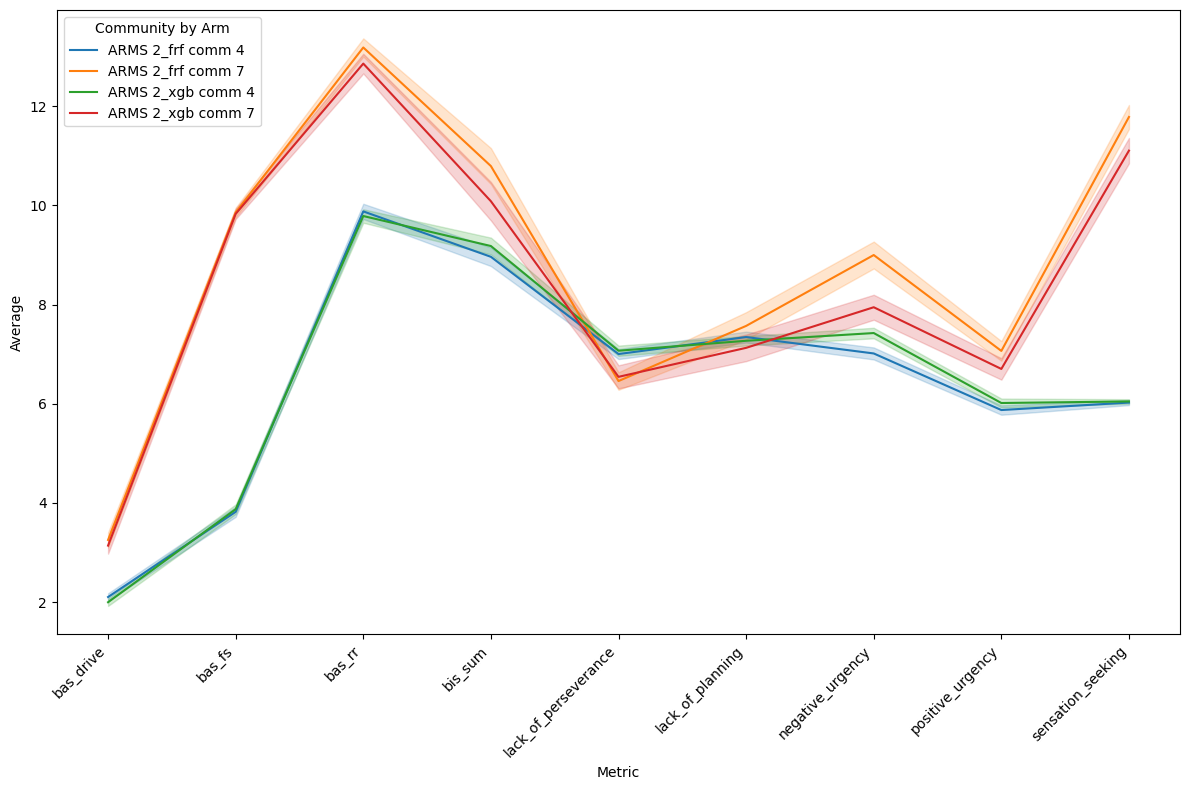

In [556]:
if df_for_plot is not None:

    colors = list(mcolors.TABLEAU_COLORS.values())
    color_values = {'all': 'black'}
    for i, (arm, community) in enumerate(df_for_plot.groupby(['arm', 'community']).groups.keys()):
        if community != 'all':
            color_values[f"ARMS {arm} comm {community}"] = colors[i % len(colors)]
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot for each community
    for (arm, community), group in df_for_plot.groupby(['arm', 'community']):
        color_key = f"ARMS {arm} comm {community}"
        if community == 'all':
            color = 'black'
            label = 'all'
        else:
            color = color_values.get(color_key, 'gray')
            label = color_key
        plt.plot('metric', 'mean', data=group, color=color, label=label)
        plt.fill_between('metric', 'mean-se', 'mean+se', data=group, color=color, alpha=0.2)
    
    # Customize the plot
    plt.xlabel('Metric')
    plt.ylabel('Average')
    #plt.title('NIHTBX Metrics for ARMS1data ARMS2xgb preds vs ARMS2frf preds, List')
    plt.xticks(rotation=45, ha='right')
    
    # Adjust legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    sorted_labels = sorted(by_label.keys(), key=lambda x: (x != 'all', x))
    sorted_handles = [by_label[label] for label in sorted_labels]
    sorted_labels = sorted_labels
    
    # Create the legend with the sorted handles and labels
    plt.legend(sorted_handles, sorted_labels, title="Community by Arm")
    
    plt.tight_layout()
    plt.savefig('./fluid_uppsbisbas_comm47_arm2xgb_prof_replication.png', dpi=300, bbox_inches='tight')
    plt.show()